# Basic Algebra

In [1]:
%matplotlib inline

In [27]:
import math
import cmath
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as p
from sympy.abc import x

### Highschool Math

Solving a linear equation of the form $ a.x + b = 0$:

In [3]:
def solve_linear_equation(a, b):
    if a == 0:
        if b == 0:
            return []
        else:
            return math.nan
    else:
        return -b / a

In [4]:
solve_linear_equation(4, 6)

-1.5

Doing some symbolic computations:

In [5]:
x = sp.symbols("x")
a, b, c = sp.symbols("a b c")
sp.solve(a * x**2 + b * x + c, x)

[(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]

We can rewrite the above statement like this:

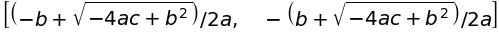

In [6]:
sp.init_printing()
x = sp.symbols("x")
a, b, c = sp.symbols("a b c")
quadratic_equation = a * x**2 + b * x + c
sp.solve(quadratic_equation, x)

We can enhance the script and rewrite it to a function including some checks on how many roots there are:

In [7]:
def solve_quadratic_equation(a, b, c):
    """
    Returns the real solutions of the quadratic equation ax^2 + bx + c = 0
    """
    discriminant = b ** 2 - 4 * a * c
    if discriminant > 0:
        x1 = (-b + math.sqrt(discriminant)) / (2 * a)
        x2 = (-b - math.sqrt(discriminant)) / (2 * a)
        return [x1, x2]
    elif discriminant == 0:
        x = -b / (2 * a)
        return [x]
    else:
        return []

In [8]:
print(solve_quadratic_equation(1, -1, -2))

[2.0, -1.0]


Let us now plot the graphs of some equations.

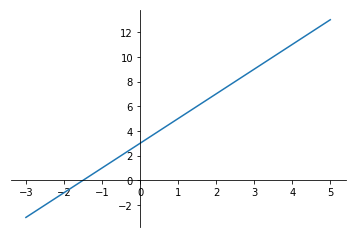

In [9]:
x = np.linspace(-3, 5, 1000)
y = 2 * x + 3
plt.plot(x, y)

plt.gca().spines["bottom"].set_position("zero")
plt.gca().spines["left"].set_position("zero")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()

Now let us define a function that plots functions:

In [10]:
def plot_function(function, min_x, max_x, num_points):
    x = np.linspace(min_x, max_x, num_points)
    function_vectorized = np.vectorize(function) # this will allow the func to be used with numpy broadcasting
    y = function_vectorized(x)
    plt.plot(x, y)
    plt.gca().spines["bottom"].set_position("zero")
    plt.gca().spines["left"].set_position("zero")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.show()

Now let us test the function with several examples:

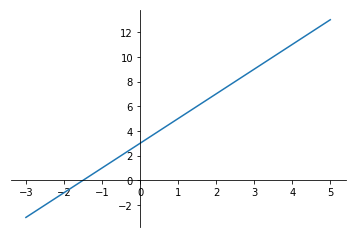

In [11]:
plot_function(lambda x: 2 * x + 3, -3, 5, 1000)

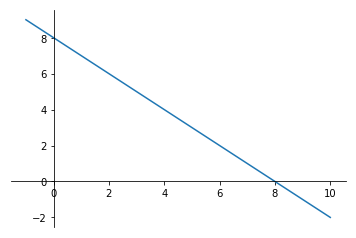

In [12]:
plot_function(lambda x: -x + 8, -1, 10, 1000)

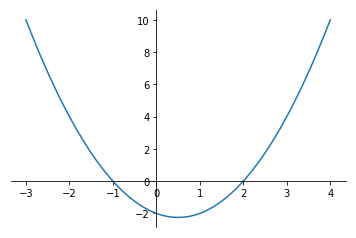

In [13]:
plot_function(lambda x: x ** 2 - x - 2, -3, 4, 1000)

The next step would be to use plotting to see where two functions intersect. For this purpose we will refactor the above function.

In [14]:
def plot_math_functions(functions, min_x, max_x, num_points):
    x = np.linspace(min_x, max_x, num_points)
    vectorized_fs = [np.vectorize(f) for f in functions]
    ys = [vectorized_f(x) for vectorized_f in vectorized_fs]
    [plt.plot(x, y) for y in ys]
    plt.gca().spines["bottom"].set_position("zero")
    plt.gca().spines["left"].set_position("zero")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.show()

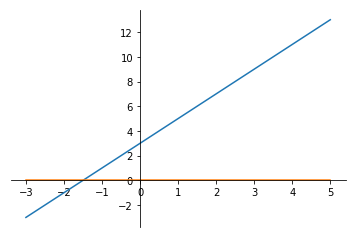

In [15]:
plot_math_functions([lambda x: 2 * x + 3, lambda x: 0], -3, 5, 1000)

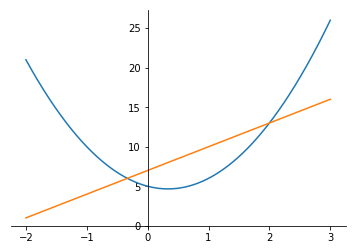

In [16]:
plot_math_functions([lambda x: 3 * x**2 - 2 * x + 5, lambda x: 3 * x + 7], -2, 3, 1000)

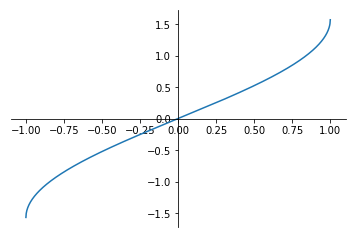

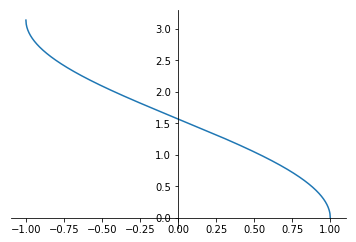

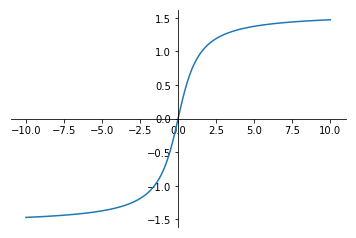

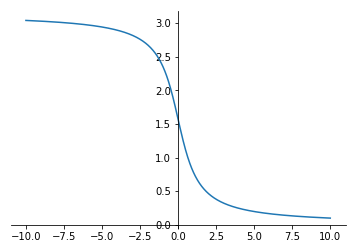

In [17]:
plot_function(np.arcsin, -1, 1, 1000)
plot_function(np.arccos, -1, 1, 1000)
plot_function(np.arctan, -10, 10, 1000)
plot_function(lambda x: np.pi / 2 - np.arctan(x), -10, 10, 1000) # arccot(x)

### Polynomials

Polynomials are just a sum of mononomials. The degree of a polynomial is the highest degree of its variable. 

In [18]:
# adding polynomials
p.polyadd([-8, 5, 2],[-2, 0, 0, 0, 3])

array([-10.,   5.,   2.,   0.,   3.])

In [19]:
# multiplying polynomials
p.polymul([-8, 5, 2],[-2, 0, 0, 0, 3])

array([ 16., -10.,  -4.,   0., -24.,  15.,   6.])

In [20]:
result = p.polymul([-8, 5, 2],[-2, 0, 0, 0, 3])

In [21]:
result

array([ 16., -10.,  -4.,   0., -24.,  15.,   6.])

In [22]:
list(reversed(result))

In [23]:
len(result)

In [24]:
for i in range(len(result)-1, -1, -1):
    print(result[i])

6.0
15.0
-24.0
0.0
-4.0
-10.0
16.0


We use sympy to pretty print the polynomial. If it's a list  we use it directly, if it's a Polynomial object, only call the coefficients.

In [28]:
polynomial = p.Polynomial([-2, 0, 0, 0, 3])
print(polynomial)
sp.init_printing()
sp.Poly(polynomial.coef, x).as_expr()

poly([-2.  0.  0.  0.  3.])


In [29]:
polynomial = p.Polynomial([-2,0,0,0,3])
sp.init_printing()
sp.Poly(reversed(polynomial.coef),x).as_expr()

Polynomial interpolation - we have a set of $n$ data points and we can try to figure out what function may have generated the data. We assume that the points are generated by a polynomial function and that the function should pass through every point. 

Let us now perform such interpolation with python.

In [30]:
points = np.array([(0, 0), (1, 0.8), (2, 0.9), (3, 0.1), (4, -0.8), (5, -1.0)])

We will extract the coordinates:

In [31]:
x = points[:, 0]
y = points[:, 1] 

In [32]:
coefficients = np.polyfit(x, y, len(points) - 1)
print(coefficients)

[-8.33333333e-03  1.25000000e-01 -5.75000000e-01  6.25000000e-01
  6.33333333e-01  4.08176161e-15]


In [33]:
poly = np.poly1d(coefficients)
print(poly)

           5         4         3         2
-0.008333 x + 0.125 x - 0.575 x + 0.625 x + 0.6333 x + 4.082e-15


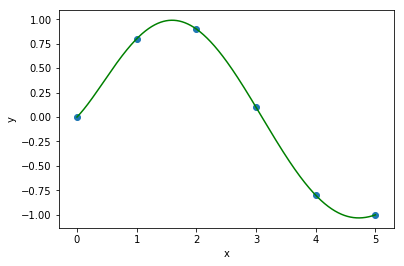

In [34]:
plot_x = np.linspace(np.min(x), np.max(x), 1000)
plot_y = poly(plot_x)

plt.plot(plot_x, plot_y, c = "green")
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Sets

Sets are an unordered collection of things - usually numbers. There is no repetition in sets. In python we can use set comprehension, which is similar to list comprehension.

In [35]:
positive_numbers = {x for x in range(-10,10) if x > 0}
print(positive_numbers)
type(positive_numbers)

{1, 2, 3, 4, 5, 6, 7, 8, 9}


set

The only difference is the curly braces.

In [36]:
positive_numbers = [x for x in range(-10,10) if x > 0]
print(positive_numbers)
type(positive_numbers)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


list

We can check if a given set is a subset of another set, or if an element is in the set:

In [37]:
{1, 2, 3}.issubset(positive_numbers)

True

In [38]:
{1, 2, 99}.issubset(positive_numbers)

False

In [39]:
5 in positive_numbers

True

In [40]:
99 in positive_numbers

False

Let us examine the basic set operations in the following examples

In [41]:
set1 = {1, 2, 3, 4, 5, 6, 7, 8, 9}
set2 = {1, 2, 2, 2, 18}

In [42]:
print(len(set1), len(set2))

9 3


In [43]:
print(set1.union(set2))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 18}


In [44]:
print(set2.union(set1))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 18}


In [45]:
print(set2.difference(set1))

{18}


In [46]:
#the symmetic difference of two sets is what is contained in them minus their intersection
print(set2.symmetric_difference(set1))

{3, 4, 5, 6, 7, 8, 9, 18}


In [47]:
print(set1.intersection(set2))

{1, 2}


### Functions

A function is a relation between a set of inputs and a set of outputs

In [48]:
def sum_of_two_numbers(a, b):
    return a + b

sum_of_two_numbers(5, 6)

In [49]:
def multiplication_of_two_numbers(a, b):
    return a * b

multiplication_of_two_numbers(5, 6)

Function can be inside other functions. This is called function composition (pipelining). Application of the functions is from innermost to outermost.

In [50]:
sum_of_two_numbers(multiplication_of_two_numbers(5, 6), 5)

A very intuitive way to get to know a function if to plot its graph.

### Complex Numbers

A complex number is a number that can be expressed in the form $ a + b.i $, where $a$ and $b$ are real numbers, and $i$ is a solution of the equation $ x^2 = −1 $ . Because no real number satisfies this equation, $i$ is called an imaginary number. For the complex number $a + b.i$, $a$ is called the real part, and $b$ is called the imaginary part. In python we use $j$ instead of $i$.

In [51]:
z = 3 + 2j

In [52]:
print(z.real)
print(z.imag)

3.0
2.0


Complex numbers can be added and multiplied

In [53]:
print((3 + 2j) + (8 + 1j))

(11+3j)


In [54]:
print((3 + 2j) * (8 + 1j))

(22+19j)


Fundamental Theorem of Algebra - every non-zero, single-variable, n-degree polynomial with complex coefficients has exactly n xomplex roots.

In [55]:
def solve_quad_equation(a, b, c):
    discriminant = cmath.sqrt(b * b - 4 * a * c)
    return [
        (- b + discriminant) / (2 * a),
        (- b - discriminant) / (2 * a)]

In [56]:
solve_quad_equation(1, -3, -4)

[(4+0j), (-1+0j)]

In [57]:
solve_quad_equation(1, 0, -4)

[(2+0j), (-2+0j)]

As we see, complex numbers can be represented by a tuple and thus can be plotted in 2 dimensions. In other words, complex numbers and 2 dimensional points are equivalent. A vector from an origin of a coordinate to this point is called **radius vector**

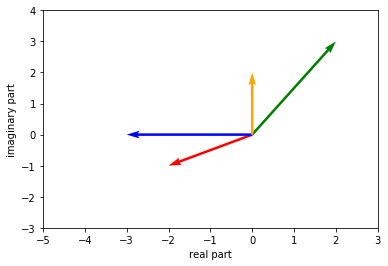

In [58]:
def plot_complex_numbers(numbers, colors):
    """
    Plots the given complex numbers as radius vectors in the 2D space
    """
    coordinates = [[0, 0, z.real, z.imag] for z in numbers]
    x, y, real, imag = zip(*coordinates)
    plt.quiver(x, y, real, imag, angles = "xy", scale_units = "xy", scale = 1, color = colors)
    
    plt.xticks(range(int(np.min(real) - 2), int(np.max(real) + 2)))
    plt.yticks(range(int(np.min(imag) - 2), int(np.max(imag) + 2)))
    plt.xlabel("real part")
    plt.ylabel("imaginary part")
    plt.show()    
    
plot_complex_numbers([2 + 3j, -2 - 1j, -3, 2j], ["green", "red", "blue", "orange"])